In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Define Class of PCA

In [2]:
class PCA:
    
    def __init__(self,n_components):
        self.n_components = n_components
        self.mean = None
        
    def fit(self,X):
        # mean centering
        self.mean = np.mean(X,axis=0)
        X = X - self.mean
        
        # covariance , functions needs samples as columns
        cov = np.cov(X.T)
        
        # eigenvectors,eigenvalues
        eigenvectors,eigenvalues = np.linalg.eig(cov)
        
        # eigenvectors v = [:,i] column vector,transform this for eaiser calculations
        eigenvectors = eigenvectors.T
        
        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.components = eigenvectors[:self.n_components]
    
    def transform(self,X):
        # projects data
        X = X-self.mean
        return np.dot(X,self.components.T)
        

* Load the Data

In [3]:
iris_df = pd.read_csv('Iris Dataset.csv')

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Remove unneccseary coulmn
iris_df.drop('Id',axis=1,inplace=True)

* Data pre processing

In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* check any cloumn is null or not

In [7]:
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# show unique entries in each column
iris_df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

* Differeniate inputs and target column

In [9]:
y = iris_df.Species
X = iris_df.drop('Species',axis=1)

* Data analysis

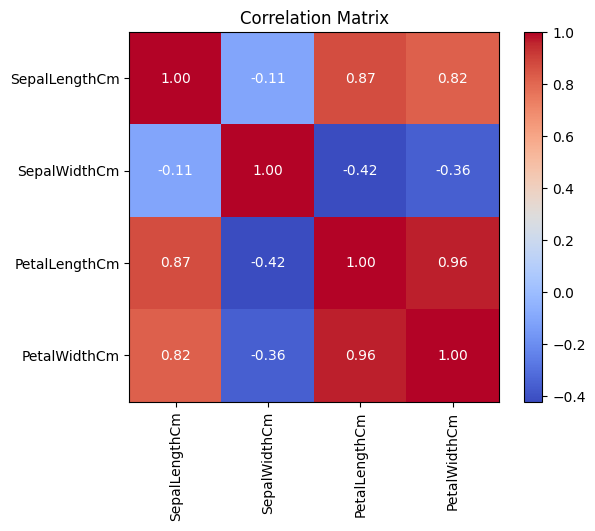

In [10]:
# plot correlation matrix
correlation_matrix = X.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

annot = True
# Adding the correlation values as annotations
if annot:
    for i in range(len(X.columns)):
        for j in range(len(X.columns)):
            text = plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                            ha="center", va="center", color="w")

plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.yticks(range(len(X.columns)), X.columns)
plt.title('Correlation Matrix')

plt.show()

* Training the model

In [11]:
# take principal component=3
pca = PCA(3)
pca.fit(X)

In [12]:
X_projected = pca.transform(X)

In [13]:
print("Shape of X:",X.shape)
print("Shape of transformed X:",X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 3)


* Plotting graph 

In [14]:
x1 = X_projected[:,0]
x2 = X_projected[:,1]
x3 = X_projected[:,2]

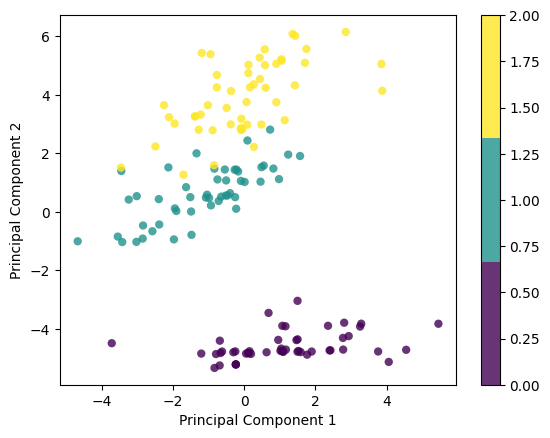

In [15]:
# plotting graph if principal components is 2
label_map = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

y_encoded = [label_map[label] for label in y]

plt.scatter(
  x1,x2,c=y_encoded,edgecolor="none",alpha=0.8,cmap=plt.get_cmap("viridis",3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

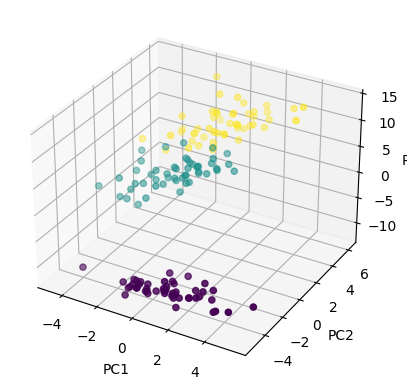

In [16]:
# use Axes3D because matplotlib only support 2D
from mpl_toolkits.mplot3d import Axes3D


# plotting graph if principal components is 3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
     x1,
     x2,
     x3,
     c=y_encoded
 )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()